#Quora Question Pairs

Problem: Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

The goal of this project is to predict which of the provided pairs of questions contains 2 questions with the same meaning.

The full description about this problem is from:
https://www.kaggle.com/competitions/quora-question-pairs/overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/train.csv", engine='python')
df.shape

(404290, 6)

##EDA

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
314909,314909,439731,439732,Now that trade caravan has been opened in CPEC...,Why does Iran want to be a part of the CPEC wh...,0
45433,45433,81424,81425,I'm not afraid of my future. What can I do?,I'm terribly afraid of my future. What should ...,0
179858,179858,29394,215780,Does the Black Knight satellite actually exist?,What is the Black Knight satellite and does it...,1
98437,98437,163570,163571,Where can I get very smooth and uncomplicated ...,Where can I get highest quality service at exc...,1
5117,5117,10083,10084,What is the OBC cut off for IIFT 2015?,What is the overall cutoff in the IIFT (Indian...,0
24452,24452,45678,45679,How can I take over the world?,How could the U.S. take over the world?,0
133305,133305,21400,213270,Is Flipkart better than Amazon in India?,Do you think Amazon has done a better job than...,1
348339,348339,476892,476893,Which is better to reduce weight? Aerobics or ...,Is it better to hit the gym or do yoga in orde...,0
269023,269023,386674,386675,Why does an electric dipole in a uniform elect...,What are the conditions for stable and unstabl...,0
161464,161464,133145,251599,Which are the best colleges for electronics an...,What are the best college in india for electro...,0


This looks like a binary classification problem, where the input is 2 questions in the form of string, we have to classify if they both mean the same or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# Check for missing values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [7]:
# check for any duplicate rows
df.duplicated().sum()

np.int64(0)

Target column: is_duplicate

Here we are checking the distribution of binary classification problem

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
Percentage of the data in each class
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

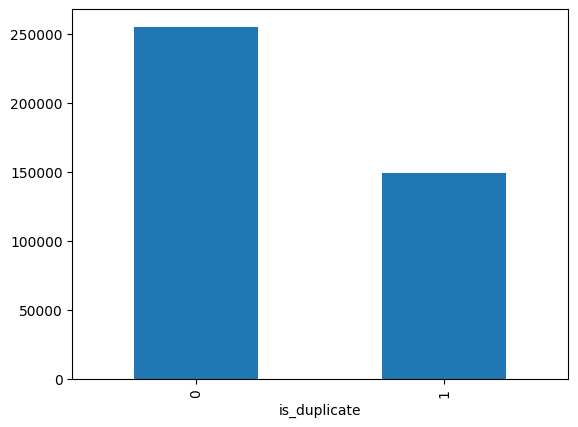

In [8]:
# Distribution of duplicated and non-duplicate questions

print(df['is_duplicate'].value_counts())
print('Percentage of the data in each class')
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Total number of question when both qid1 and qid2 are included: {qid.shape}')
print(f'Number of unique questions: {np.unique(qid).shape}')
x = qid.value_counts() > 1
print(f'Number of questions getting repeated: {x[x].shape}')

Total number of question when both qid1 and qid2 are included: (808580,)
Number of unique questions: (537933,)
Number of questions getting repeated: (111780,)


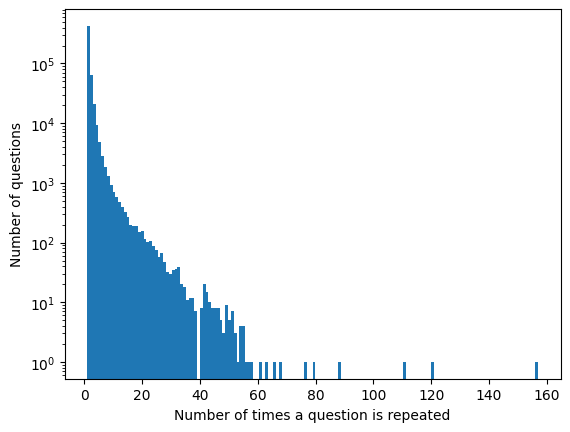

In [10]:
# repeated questions histogram
plt.hist(qid.value_counts(), bins=160)
plt.yscale('log')
plt.xlabel('Number of times a question is repeated')
plt.ylabel('Number of questions')
plt.show()

I method:

we'll use bag of words on the column `question1` and `question2` then apply Random Forest approach.

In [11]:
new_df = df.sample(30000)

In [12]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [13]:
new_df.duplicated().sum()

np.int64(0)

In [14]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
360936,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?
357483,How can someone brainwash you?,Is it possible to brainwash yourself?
314963,What happened to cubesmith.com?,What happened to bloodshow.com?
152042,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...
114455,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?


In [15]:
ques_df.shape

(30000, 2)

## What is CountVectorizer?

* It’s a feature extraction technique from scikit-learn (Python ML library).

* It converts a collection of text documents into a matrix of token counts (Bag of Words model).

* In simple words → It counts how many times each word appears in your dataset and turns text into numbers (vectors) so ML models can use it.

**How it works**

1. Tokenization → Splits text into words.

2. Build vocabulary → Collects all unique words.

3. Count frequency → For each document, counts how many times each word occurs.

**Sample documents**

docs = [
    "I love machine learning",
    "Machine learning is amazing",
    "I love coding"
]

vocabulary = ['amazing', 'coding', 'is', 'learning', 'love', 'machine']

Matrix (rows = docs, columns = words):

* [[0 0 0 1 1 1]   # Doc1: "I love machine learning"
* [1 0 1 1 0 1]   # Doc2: "Machine learning is amazing"
* [0 1 0 0 1 0]]  # Doc3: "I love coding"


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
print(len(questions))
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

60000


In [17]:
q1_arr.shape

(30000, 3000)

In [18]:
q1_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
q2_arr.shape

(30000, 3000)

In [20]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [21]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
360936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
314963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


when you execute `temp_df['is_duplicate'] = new_df['is_duplicate']`, the `is_duplicate` column is correctly placed according to the original dataset (`new_df`).

This is because `temp_df1` and `temp_df2` were created using the index of `ques_df`, which is a subset of `new_df`. When you concatenated `temp_df1` and `temp_df2` to create `temp_df`, the index was preserved. Therefore, assigning `new_df['is_duplicate']` to `temp_df['is_duplicate']` aligns the values based on the shared index, ensuring that the `is_duplicate` value for each row in `temp_df` corresponds to the correct pair of questions from the original new_df.



In [22]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [23]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
360936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
314963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=42)

In [25]:
# lets apply Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7306666666666667

Now,

First, let's do some feature engineering and create some of the features

* q1 len -> char length of q1
* q2 len -> char length of q2
* q1 words -> number of words in q1
* q2 words -> number of words in q2
* words common -> number of common unique words from both q1 and q2
* words total -> total number of words in q1 + toal number of words in q2
* words share -> word common / word total

In [26]:
df2 = new_df
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1


In [27]:
df2.shape

(30000, 6)

In [28]:
# Feature engineering
df2['q1_len'] = df2['question1'].str.len()
df2['q2_len'] = df2['question2'].str.len()

In [29]:
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0,42,44
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0,30,37
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0,31,31
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0,26,120
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1,47,46


In [30]:
df2['q1_num_words'] = df2['question1'].apply(lambda row: len(row.split(" ")))
df2['q2_num_words'] = df2['question2'].apply(lambda row: len(row.split(" ")))
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0,42,44,8,11
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0,30,37,5,6
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0,31,31,4,4
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0,26,120,6,22
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1,47,46,9,9


In [31]:
df2.iloc[7]

,273245
id,273245
qid1,391678
qid2,391679
question1,Why do some headphones make my ears so uncomfo...
question2,Why do I hear my own breath when I wear in-ear...
is_duplicate,0
q1_len,232
q2_len,78
q1_num_words,40
q2_num_words,17


In [32]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [33]:
"Which is the best tour operator in Kerala?".split(" ")

['Which', 'is', 'the', 'best', 'tour', 'operator', 'in', 'Kerala?']

In [34]:
lambda word: word.lower().strip()

<function __main__.<lambda>(word)>

In [35]:
list(map(lambda word: word.lower().strip(), "Which is the best tour operator in Kerala?".split(" ")))

['which', 'is', 'the', 'best', 'tour', 'operator', 'in', 'kerala?']

In [36]:
set(map(lambda word: word.lower().strip(), "Which is the best tour operator in Kerala?".split(" ")))

{'best', 'in', 'is', 'kerala?', 'operator', 'the', 'tour', 'which'}

Question 1: Which is the best tour operator in Kerala?

In [37]:
w1 = set(map(lambda word: word.lower().strip(), "Which is the best tour operator in Kerala?".split(" ")))
w1

{'best', 'in', 'is', 'kerala?', 'operator', 'the', 'tour', 'which'}

Question 2: Which is the best tour provider in Kerala?

In [38]:
w2 = set(map(lambda word: word.lower().strip(), "Which is the best tour provider in Kerala?".split(" ")))
w2

{'best', 'in', 'is', 'kerala?', 'provider', 'the', 'tour', 'which'}

In [39]:
len(w1 & w2)

7

In [40]:
df2['word_common'] = df2.apply(common_words, axis=1)
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0,42,44,8,11,4
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0,30,37,5,6,1
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0,31,31,4,4,3
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0,26,120,6,22,2
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1,47,46,9,9,3


In [41]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [42]:
df2['word_total'] = df2.apply(total_words, axis=1)
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0,42,44,8,11,4,18
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0,30,37,5,6,1,11
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0,31,31,4,4,3,8
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0,26,120,6,22,2,28
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1,47,46,9,9,3,18


In [43]:
df2['word_share'] = round(df2['word_common']/df2['word_total'], 2)
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
360936,360936,490730,490731,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?,0,42,44,8,11,4,18,0.22
357483,357483,486899,486900,How can someone brainwash you?,Is it possible to brainwash yourself?,0,30,37,5,6,1,11,0.09
314963,314963,150891,17499,What happened to cubesmith.com?,What happened to bloodshow.com?,0,31,31,4,4,3,8,0.38
152042,152042,238963,238964,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...,0,26,120,6,22,2,28,0.07
114455,114455,61334,32371,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?,1,47,46,9,9,3,18,0.17


minimum characters in q1 among all q1s: 1
maximum characters in q1 among all q1s: 623
average number of characters in q1: 59.45493333333334


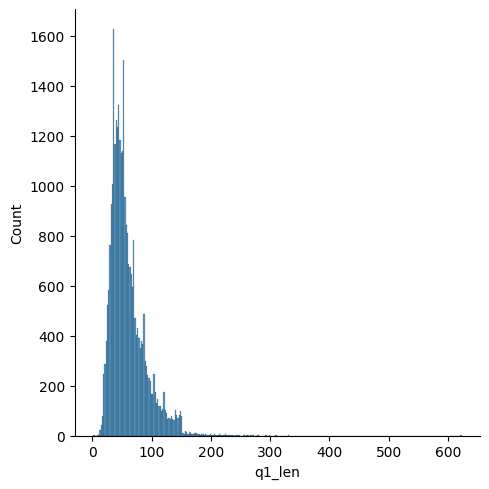

In [44]:
# Analysis of features
sns.displot(df2['q1_len'])
print(f'minimum characters in q1 among all q1s: {df2["q1_len"].min()}')
print(f'maximum characters in q1 among all q1s: {df2["q1_len"].max()}')
print(f'average number of characters in q1: {np.mean(df2["q1_len"])}')

minimum characters in q1 among all q1s: 3
maximum characters in q1 among all q1s: 823
average number of characters in q1: 59.98673333333333


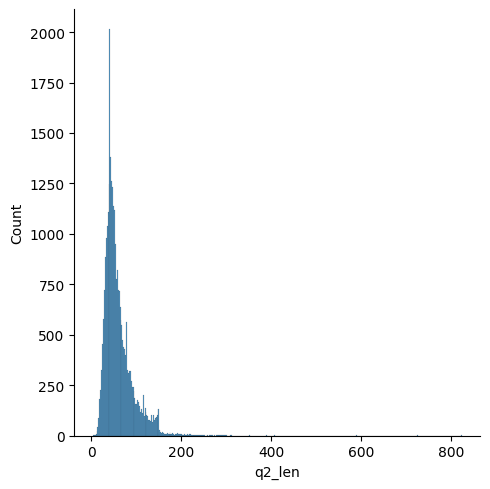

In [45]:
sns.displot(df2['q2_len'])
print(f'minimum characters in q1 among all q1s: {df2["q2_len"].min()}')
print(f'maximum characters in q1 among all q1s: {df2["q2_len"].max()}')
print(f'average number of characters in q1: {np.mean(df2["q2_len"])}')

minimum words in q1 among all q1s: 1
maximum words in q1 among all q1s: 125
average number of words in q1: 10.932033333333333


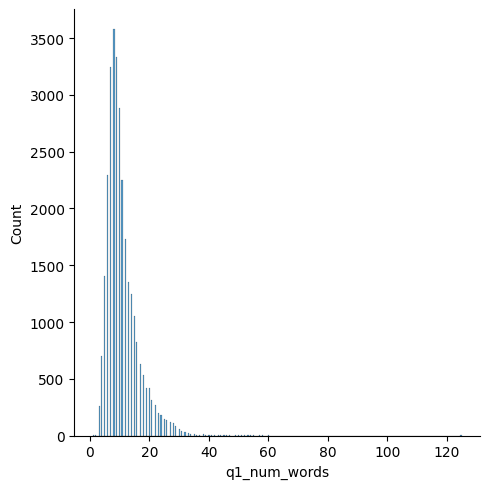

In [46]:
sns.displot(df2['q1_num_words'])
print(f'minimum words in q1 among all q1s: {df2["q1_num_words"].min()}')
print(f'maximum words in q1 among all q1s: {df2["q1_num_words"].max()}')
print(f'average number of words in q1: {np.mean(df2["q1_num_words"])}')

minimum words in q1 among all q1s: 1
maximum words in q1 among all q1s: 149
average number of words in q1: 11.161766666666667


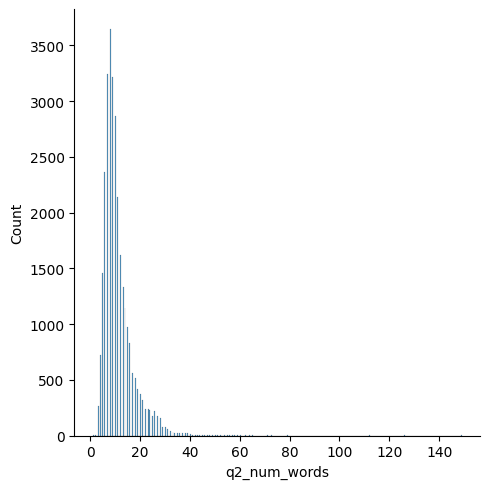

In [47]:
sns.displot(df2['q2_num_words'])
print(f'minimum words in q1 among all q1s: {df2["q2_num_words"].min()}')
print(f'maximum words in q1 among all q1s: {df2["q2_num_words"].max()}')
print(f'average number of words in q1: {np.mean(df2["q2_num_words"])}')

/tmp/ipython-input-1894276704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 0]['word_common'], label='non duplicate')
/tmp/ipython-input-1894276704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 1]['word_common'], label='duplicate'

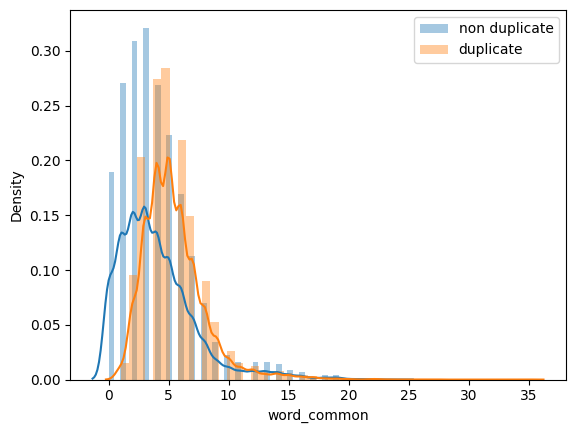

In [48]:
# common words
sns.distplot(df2[df2['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(df2[df2['is_duplicate'] == 1]['word_common'], label='duplicate')
plt.legend()
plt.show()


In this above graph, we can infere that, if in `q1` and `q2` there are less than `4` common words (blue line, non-duplicate pair) then that pair of questions has a high probability of being non-duplicate, whereas if the common words are more than `4` then that pair of questions has high probability of being duplicate.

/tmp/ipython-input-666198739.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 0]['word_total'], label='non duplicate')
/tmp/ipython-input-666198739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 1]['word_total'], label='duplicate')


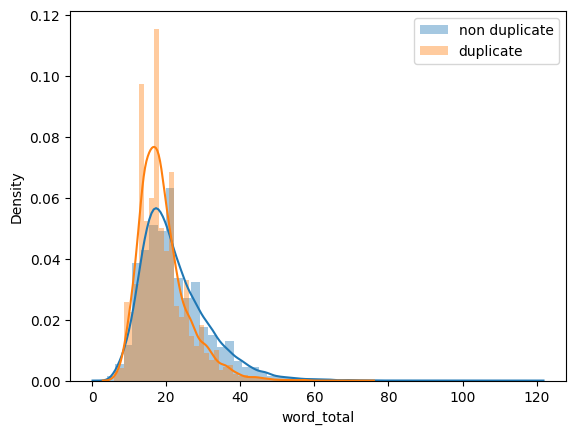

In [49]:
# total words
sns.distplot(df2[df2['is_duplicate'] == 0]['word_total'], label='non duplicate')
sns.distplot(df2[df2['is_duplicate'] == 1]['word_total'], label='duplicate')
plt.legend()
plt.show()

/tmp/ipython-input-2566987776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 0]['word_share'], label='non duplicate')
/tmp/ipython-input-2566987776.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2['is_duplicate'] == 1]['word_share'], label='duplicate')


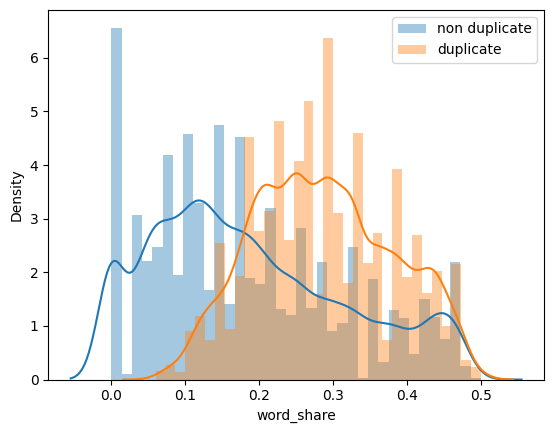

In [50]:
# word share
sns.distplot(df2[df2['is_duplicate'] == 0]['word_share'], label='non duplicate')
sns.distplot(df2[df2['is_duplicate'] == 1]['word_share'], label='duplicate')
plt.legend()
plt.show()

In this above graph, we can infer that, for the word_share value below 0.18 (approx), then that row has high probability of being non-duplicate and above 0.18 then it has high probability of being duplicate.

In [51]:
ques_df2 = df2[['question1', 'question2']]
ques_df2.head()

,question1,question2
360936,Where can I find crack for overwatch game?,How do I get the crack for The Crew PC game?
357483,How can someone brainwash you?,Is it possible to brainwash yourself?
314963,What happened to cubesmith.com?,What happened to bloodshow.com?
152042,Is Steve Bannon a bad guy?,If the recent fake political news stories are ...
114455,Does giving Benadryl to a dog make them sleepy?,What are the effects of giving a dog Benadryl?


In [52]:
final_df = df2.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
360936,0,42,44,8,11,4,18,0.22
357483,0,30,37,5,6,1,11,0.09
314963,0,31,31,4,4,3,8,0.38
152042,0,26,120,6,22,2,28,0.07
114455,1,47,46,9,9,3,18,0.17


In [53]:
# Applying CountVectorizer on ques_df2
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df2['question1']) + list(ques_df2['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [54]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df2.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df2.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [55]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
360936,0,42,44,8,11,4,18,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
357483,0,30,37,5,6,1,11,0.09,0,0,...,0,0,0,0,0,1,0,0,0,0
314963,0,31,31,4,4,3,8,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
152042,0,26,120,6,22,2,28,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
114455,1,47,46,9,9,3,18,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7633333333333333